<a href="https://colab.research.google.com/github/Addo-Agyekum/selfvibe-terms-privacy-pricing-page/blob/main/socialmedia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# STEP 1: Install dependencies
!pip install openpyxl

# STEP 2: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Display plots inline
%matplotlib inline
sns.set(style="whitegrid")

# STEP 3: Load the dataset
file_url = 'data.xlsx'  # replace with uploaded path in Colab
df = pd.read_excel(file_url)

# STEP 4: Preview the data
df.head()

,ID,What is your gender?,How old are you?,What is the highest level of education you've completed?,Which social media channel do you use most?,Have you ever been influenced by social media to get a product?,Did you go through with the purchase and if you did what did you buy?,Were you influenced by an Ad or an Influencer?,What are your feelings towards Ads and Influencer marketing tools?,Brand and reputation,Value for the price,social media influence,Recommendation from others,Advertising,Good reviews
0,1,Woman,26 - 35,Master's degree,Instagram;YouTube;Pinterest;Facebook;TikTok;X ...,Maybe,skin care product,Infuencer;,"I am okay with it, I like recommendation;",Extremely important,Extremely important,Somewhat important,Extremely important,Somewhat important,Extremely important
1,2,Man,18 - 25,Bachelor's degree,YouTube;TikTok;X ( Twitter);Instagram;Pinteres...,Yes,Video Games,Ad;Infuencer;,I prefer my own research into products;,Extremely important,Extremely important,Extremely unimportant,Somewhat important,Somewhat unimportant,Extremely important
2,3,Woman,18 - 25,Bachelor's degree,Instagram;X ( Twitter);TikTok;YouTube;Pinteres...,Yes,Bags,Infuencer;Ad;,"I am okay with it, I like recommendation;",Extremely important,Somewhat important,Neutral,Extremely important,Neutral,Extremely important
3,4,Woman,26 - 35,Master's degree,YouTube;TikTok;Instagram;X ( Twitter);Facebook...,Yes,Clothes and shoes.,Infuencer;Ad;,"I am okay with it, I like recommendation;",Extremely important,Somewhat unimportant,Somewhat unimportant,Extremely important,Extremely important,Extremely important
4,5,Woman,26 - 35,Master's degree,TikTok;Instagram;Pinterest;X ( Twitter);Facebo...,Yes,NaN,Ad;,"I am okay with it, I like recommendation;",Neutral,Neutral,Somewhat important,Somewhat important,Somewhat important,Extremely important


In [3]:
# Strip whitespace from column names
df.columns = df.columns.str.strip()

# Rename key columns for easier access
df.rename(columns={
    'What is your gender?': 'Gender',
    'How old are you?': 'Age',
    "What is the highest level of education you've completed?": 'Education',
    'Which social media channel do you use most?': 'Preferred Platforms',
    'Have you ever been influenced by social media to get a product?': 'Influenced to Buy',
    'Did you go through with the purchase and if you did what did you buy?': 'What Bought',
    'Were you influenced by an Ad or an Influencer?': 'Ad or Influencer',
    'What are your feelings towards Ads and Influencer marketing tools?': 'Feelings About Marketing',
    'Brand and reputation': 'Brand Reputation',
    'Value for the price': 'Value for Price',
    'social media influence': 'Social Media Influence',
    'Recommendation from others': 'Recommendations',
    'Advertising ': 'Advertising',
    'Good reviews': 'Good Reviews'
}, inplace=True)


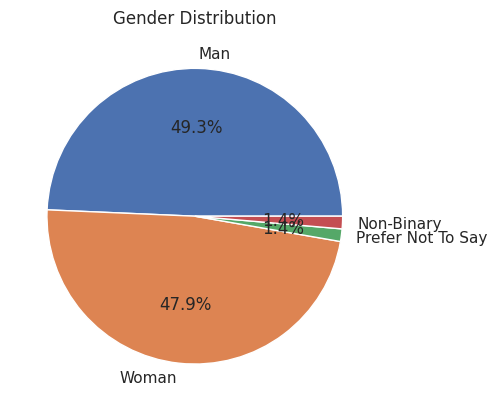

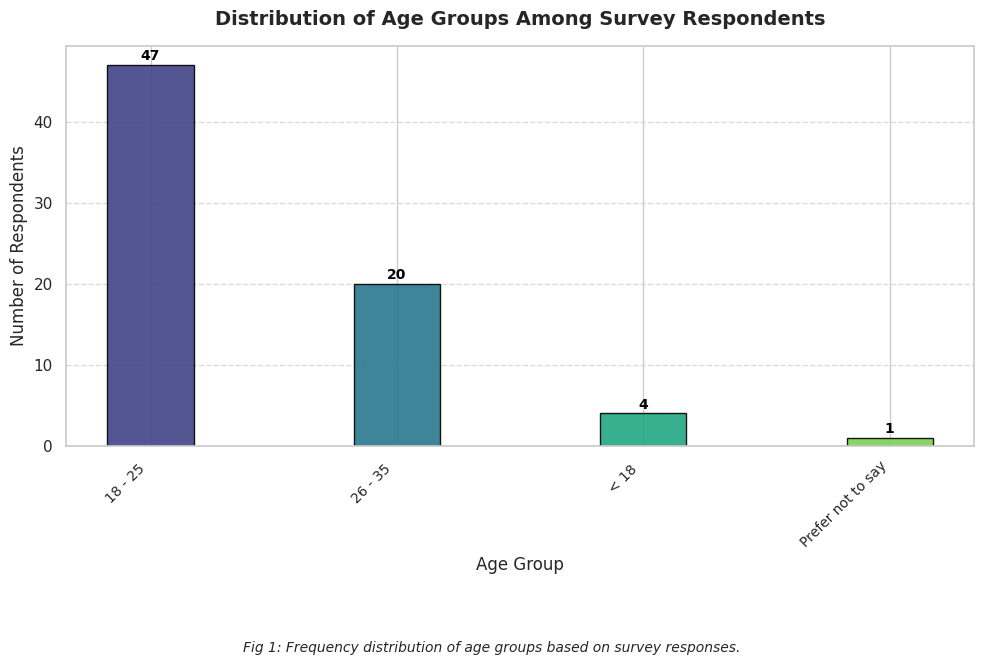

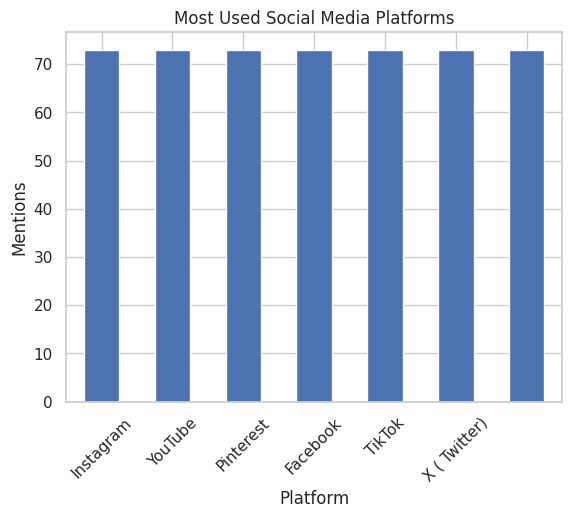

In [33]:
# Gender distribution
df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Gender Distribution', ylabel='')
plt.show()
########################################################
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set a modern seaborn style for a professional and clean look
sns.set_style("whitegrid")

# Assuming df is the DataFrame with the relevant data
# Calculate the value counts for the 'Age' column and sort by index
age_counts = df['Age'].value_counts().sort_index()

# Define a vibrant, colorblind-friendly gradient color palette
colors = sns.color_palette("viridis", len(age_counts))

# Create a figure with a suitable size for academic presentation
plt.figure(figsize=(10, 6))

# Plot the bar chart with customized aesthetics
bars = plt.bar(age_counts.index, age_counts.values,
               color=colors, edgecolor='black', width=0.35, alpha=0.9)

# Add data labels on top of each bar for clarity
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.2, int(yval),
             ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

# Customize the title and labels with academic formatting
plt.title('Distribution of Age Groups Among Survey Respondents',
          fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Number of Respondents', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)

# Add a subtle grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add a caption for academic context
plt.figtext(0.5, -0.1,
            'Fig 1: Frequency distribution of age groups based on survey responses.',
            ha='center', fontsize=10, style='italic')

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Display the plot
plt.show()
#####################################################################
# Platform usage frequency
from collections import Counter

# Explode the semi-colon separated lists
platforms = df['Preferred Platforms'].dropna().str.split(';').explode()
platform_counts = platforms.value_counts()

platform_counts.plot(kind='bar', title='Most Used Social Media Platforms')
plt.xlabel("Platform")
plt.ylabel("Mentions")
plt.xticks(rotation=45)
plt.show()


<Figure size 1000x600 with 0 Axes>

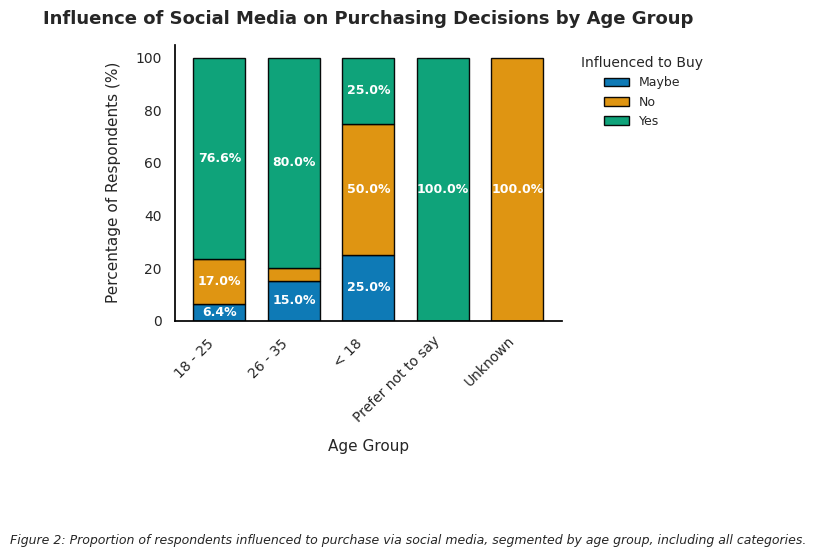

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set a clean seaborn style for academic presentation
sns.set_style("whitegrid", {"axes.grid": False, "axes.edgecolor": "black"})

# Load the dataset
df = pd.read_excel('cleaned_survey_data.xlsx')

# Handle missing age values (one respondent has missing age)
# Replace missing age with 'Unknown' to include in visualization
df['Age'] = df['Age'].fillna('Unknown')

# Filter out unwanted gender categories
filtered_df = df[~df['Age'].isin(['Unknown', 'Prefer Not To Say'])].copy()

# Create a cross-tabulation: Age vs. Influenced to Buy (normalized to percentages)
age_influence_ct = pd.crosstab(df['Age'], df['Influenced to Buy'],
                               normalize='index') * 100

# Verify that data exists for plotting
if age_influence_ct.empty:
    print("Warning: No data available for plotting after processing.")
else:
    # Create a figure with a suitable size to accommodate multiple age groups
    plt.figure(figsize=(10, 6))

    # Plot a stacked bar chart with a colorblind-friendly palette
    age_influence_ct.plot(kind='bar', stacked=True,
                         color=sns.color_palette("colorblind", len(age_influence_ct.columns)),
                         edgecolor='black', width=0.7, alpha=0.95)

    # Add percentage labels within each segment for segments >5% to avoid clutter
    for i, (index, row) in enumerate(age_influence_ct.iterrows()):
        cumsum = 0
        for col, val in row.items():
            if val > 5:  # Only label segments >5% for readability
                plt.text(i, cumsum + val/2, f'{val:.1f}%',
                         ha='center', va='center', fontsize=9, fontweight='bold', color='white')
            cumsum += val

    # Customize the title with academic formatting
    plt.title('Influence of Social Media on Purchasing Decisions by Age Group',
              fontsize=13, fontweight='bold', pad=15, loc='center')

    # Customize axis labels
    plt.xlabel('Age Group', fontsize=11, labelpad=10)
    plt.ylabel('Percentage of Respondents (%)', fontsize=11, labelpad=10)

    # Rotate x-axis labels for readability
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)

    # Add a legend with a clear title, positioned outside the plot
    plt.legend(title='Influenced to Buy', fontsize=9, title_fontsize=10,
               loc='upper left', bbox_to_anchor=(1.02, 1), frameon=False)

    # Add a caption for academic context, positioned below the figure
    plt.figtext(0.5, -0.15,
                'Figure 2: Proportion of respondents influenced to purchase via social media, segmented by age group, including all categories.',
                ha='center', fontsize=9, style='italic')

    # Remove top and right spines for a cleaner look
    sns.despine()

    # Adjust layout to prevent cutoff of labels and caption
    plt.tight_layout()

    # Display the plot
    plt.show()

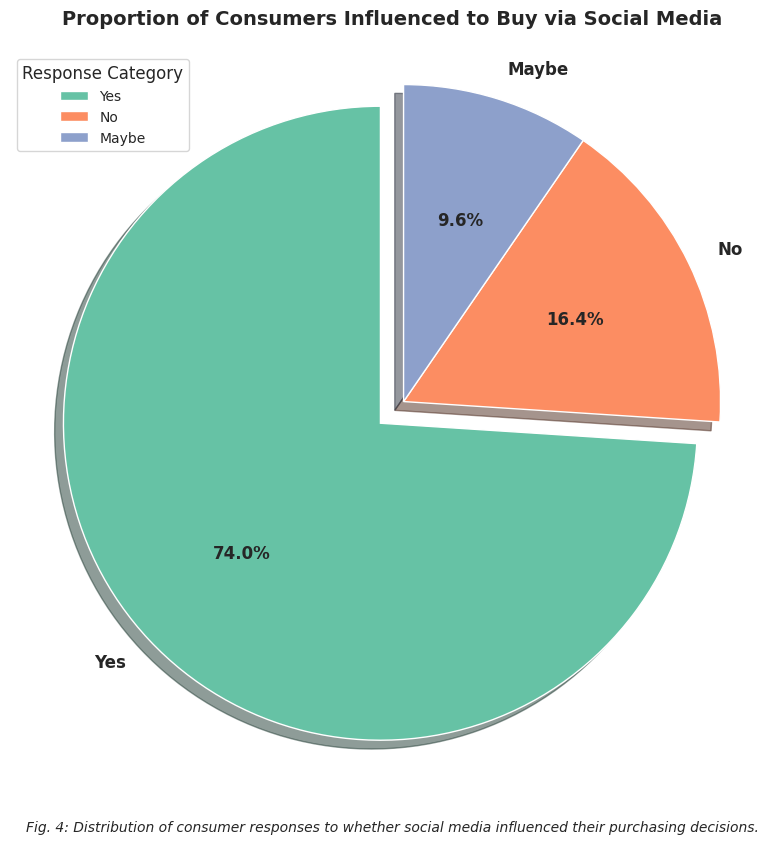

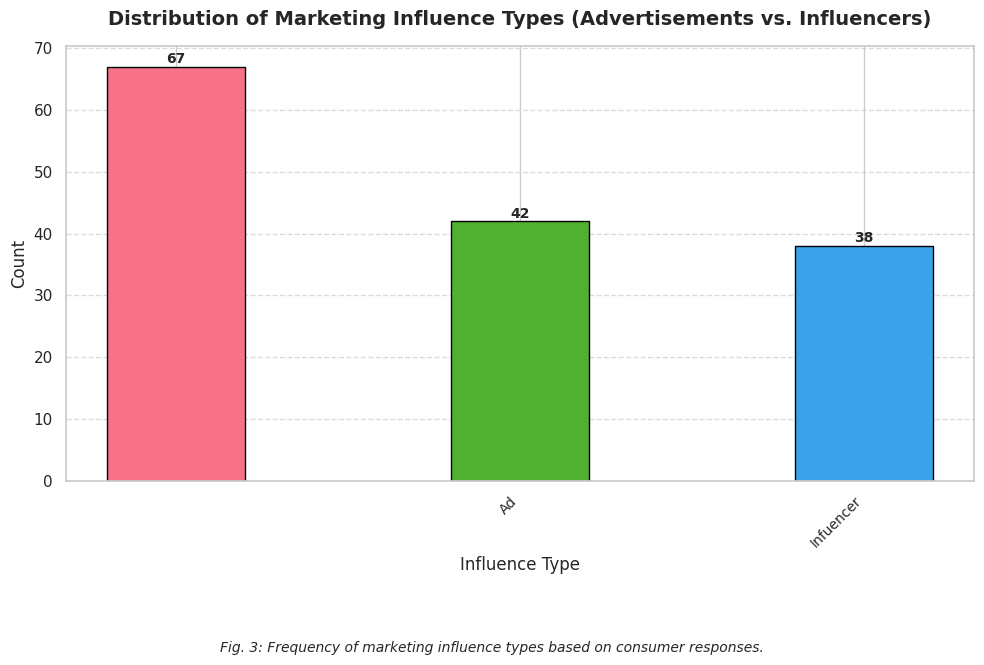

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set a modern seaborn style for a professional look
sns.set_style("white")

# Assuming df is the DataFrame with the relevant data
# Calculate the value counts for the 'Influenced to Buy' column
influence_counts = df['Influenced to Buy'].value_counts()

# Define a vibrant, colorblind-friendly color palette
colors = sns.color_palette("Set2", len(influence_counts))

# Create a figure with a suitable size for academic presentation
plt.figure(figsize=(8, 8))

# Create the pie chart
wedges, texts, autotexts = plt.pie(
    influence_counts.values,
    labels=influence_counts.index,
    colors=colors,
    autopct='%1.1f%%',  # Display percentage labels
    startangle=90,      # Rotate for better orientation
    shadow=True,        # Add shadow for visual depth
    explode=[0.1 if i == 0 else 0 for i in range(len(influence_counts))],  # Explode the largest slice
    textprops={'fontsize': 12, 'fontweight': 'bold'}  # Customize label font
)

# Customize the title with academic formatting
plt.title(
    'Proportion of Consumers Influenced to Buy via Social Media',
    fontsize=14,
    fontweight='bold',
    pad=20
)

# Add a legend for clarity
plt.legend(
    influence_counts.index,
    title="Response Category",
    loc="best",
    fontsize=10
)

# Ensure equal aspect ratio for a circular pie chart
plt.axis('equal')

# Add a caption for academic context
plt.figtext(
    0.5, -0.05,
    'Fig. 4: Distribution of consumer responses to whether social media influenced their purchasing decisions.',
    ha='center',
    fontsize=10,
    style='italic'
)

# Adjust layout to prevent cutoff
plt.tight_layout()

# Display the plot
plt.show()

################################################################################

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set a modern seaborn style for a professional and clean look
sns.set_style("whitegrid")

# Assuming df is the DataFrame with the relevant data
# Process the 'Ad or Influencer' column to extract and count influencer types
influencer_types = df['Ad or Influencer'].dropna().str.replace(';', ',').str.split(',').explode().str.strip()
influencer_counts = influencer_types.value_counts()

# Define a vibrant and professional color palette (using seaborn's colorblind-friendly palette)
colors = sns.color_palette("husl", len(influencer_counts))

# Create a figure and axis with a larger size for clarity
plt.figure(figsize=(10, 6))

# Plot the bar chart with customized aesthetics
bars = plt.bar(influencer_counts.index, influencer_counts.values,
               color=colors, edgecolor='black', width=0.4)

# Add data labels on top of each bar for clarity
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, int(yval),
             ha='center', va='bottom', fontsize=10, fontweight='bold')

# Customize the title and labels with academic formatting
plt.title('Distribution of Marketing Influence Types (Advertisements vs. Influencers)',
          fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Influence Type', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45, ha='right', fontsize=10)

# Add a subtle grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add a caption for academic context
plt.figtext(0.5, -0.1,
            'Fig. 3: Frequency of marketing influence types based on consumer responses.',
            ha='center', fontsize=10, style='italic')

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Display the plot
plt.show()


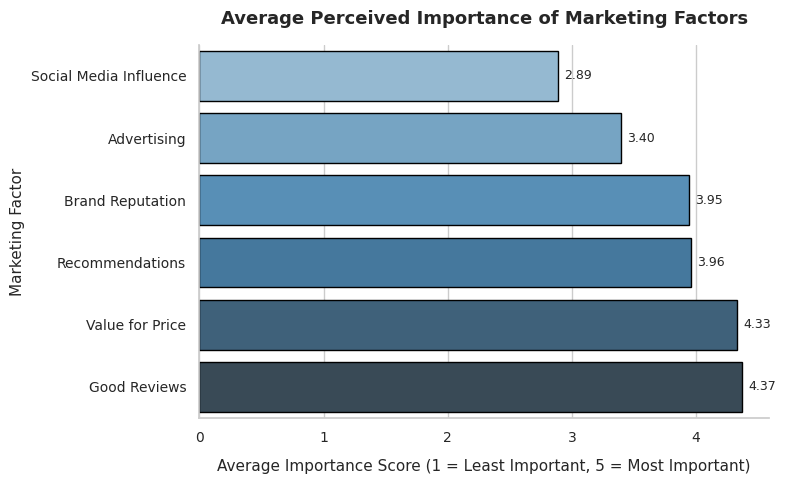

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define custom Likert scale encoding
likert_map = {
    'Extremely unimportant': 1,
    'Somewhat unimportant': 2,
    'Neutral': 3,
    'Somewhat important': 4,
    'Extremely important': 5
}

# Define relevant columns for scoring
columns_to_score = [
    'Brand Reputation',
    'Value for Price',
    'Social Media Influence',
    'Recommendations',
    'Advertising',
    'Good Reviews'
]

# Map Likert responses to numeric scores for analysis
for col in columns_to_score:
    df[col + ' (Score)'] = df[col].map(likert_map)

# Compute average score per factor
avg_scores = df[[col + ' (Score)' for col in columns_to_score]].mean()
avg_scores.index = columns_to_score  # Clean up index for plotting

# Sort scores in ascending order for a horizontal bar plot
avg_scores = avg_scores.sort_values()

# Set seaborn style for consistent visuals
sns.set_style("whitegrid")

# Create horizontal bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_scores.values, y=avg_scores.index, palette="Blues_d", edgecolor="black")

# Add value labels to bars
for i, val in enumerate(avg_scores.values):
    plt.text(val + 0.05, i, f'{val:.2f}', va='center', fontsize=9)

# Customize plot aesthetics
plt.title('Average Perceived Importance of Marketing Factors', fontsize=13, fontweight='bold', pad=15)
plt.xlabel('Average Importance Score (1 = Least Important, 5 = Most Important)', fontsize=11, labelpad=10)
plt.ylabel('Marketing Factor', fontsize=11)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Remove spines for cleaner look
sns.despine()
plt.tight_layout()

# Show the plot
plt.show()


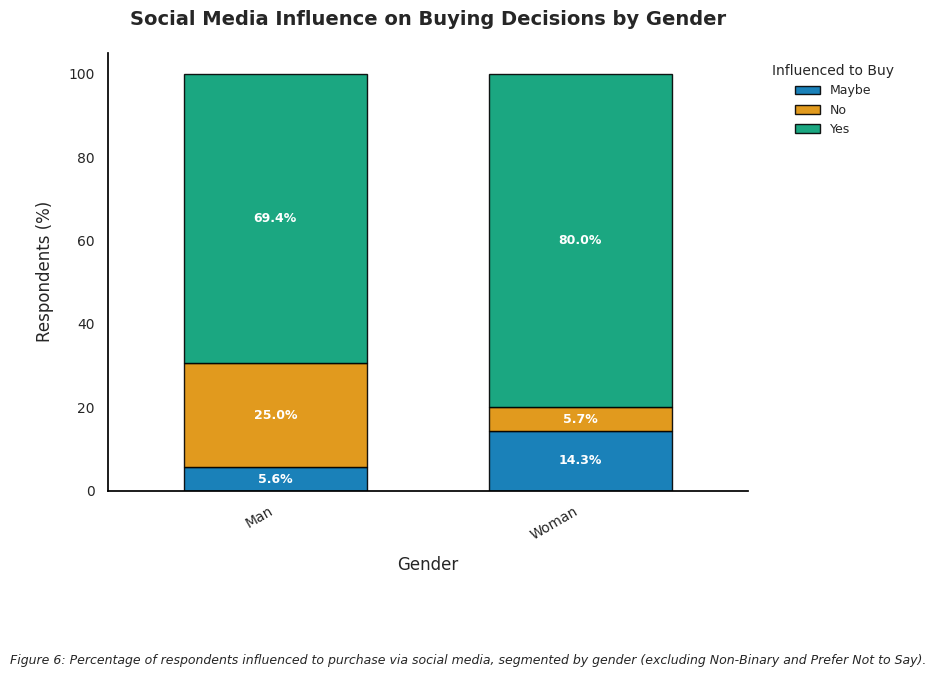

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Standardize gender labels before filtering
df['Gender'] = df['Gender'].str.strip().str.title()

# Filter out unwanted gender categories
filtered_df = df[~df['Gender'].isin(['Non-Binary', 'Prefer Not To Say'])].copy()

# Set seaborn style for clean academic visualization
sns.set_theme(style="whitegrid", rc={"axes.edgecolor": "black", "axes.grid": False})

# Compute normalized cross-tabulation: Gender vs. Influenced to Buy (%)
gender_influence_ct = pd.crosstab(
    filtered_df['Gender'],
    filtered_df['Influenced to Buy'],
    normalize='index'
) * 100

# Handle empty DataFrame case
if gender_influence_ct.empty:
    print("Warning: No data remains after filtering selected genders.")
else:
    # Set up the figure
    fig, ax = plt.subplots(figsize=(9, 6))

    # Plot stacked bar chart
    gender_influence_ct.plot(
        kind='bar',
        stacked=True,
        ax=ax,
        color=sns.color_palette("colorblind", n_colors=len(gender_influence_ct.columns)),
        edgecolor='black',
        width=0.6,
        alpha=0.9
    )

    # Add percentage labels inside each bar segment
    for idx, (index, row) in enumerate(gender_influence_ct.iterrows()):
        cumulative = 0
        for col in gender_influence_ct.columns:
            value = row[col]
            if value > 5:  # Avoid clutter by skipping small segments
                ax.text(
                    idx, cumulative + value / 2,
                    f'{value:.1f}%',
                    ha='center', va='center',
                    fontsize=9, fontweight='bold', color='white'
                )
            cumulative += value

    # Set chart title and labels
    ax.set_title(
        'Social Media Influence on Buying Decisions by Gender',
        fontsize=14, fontweight='bold', pad=20
    )
    ax.set_xlabel('Gender', fontsize=12, labelpad=10)
    ax.set_ylabel('Respondents (%)', fontsize=12, labelpad=10)

    # Rotate x-axis labels for clarity
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right', fontsize=10)
    ax.tick_params(axis='y', labelsize=10)

    # Add legend outside the plot for clarity
    ax.legend(
        title='Influenced to Buy',
        title_fontsize=10,
        fontsize=9,
        loc='upper left',
        bbox_to_anchor=(1.02, 1),
        frameon=False
    )

    # Add academic-style caption
    plt.figtext(
        0.5, -0.12,
        'Figure 6: Percentage of respondents influenced to purchase via social media, segmented by gender (excluding Non-Binary and Prefer Not to Say).',
        ha='center',
        fontsize=9,
        style='italic'
    )

    # Clean up spines and layout
    sns.despine()
    plt.tight_layout()

    # Show the plot
    plt.show()


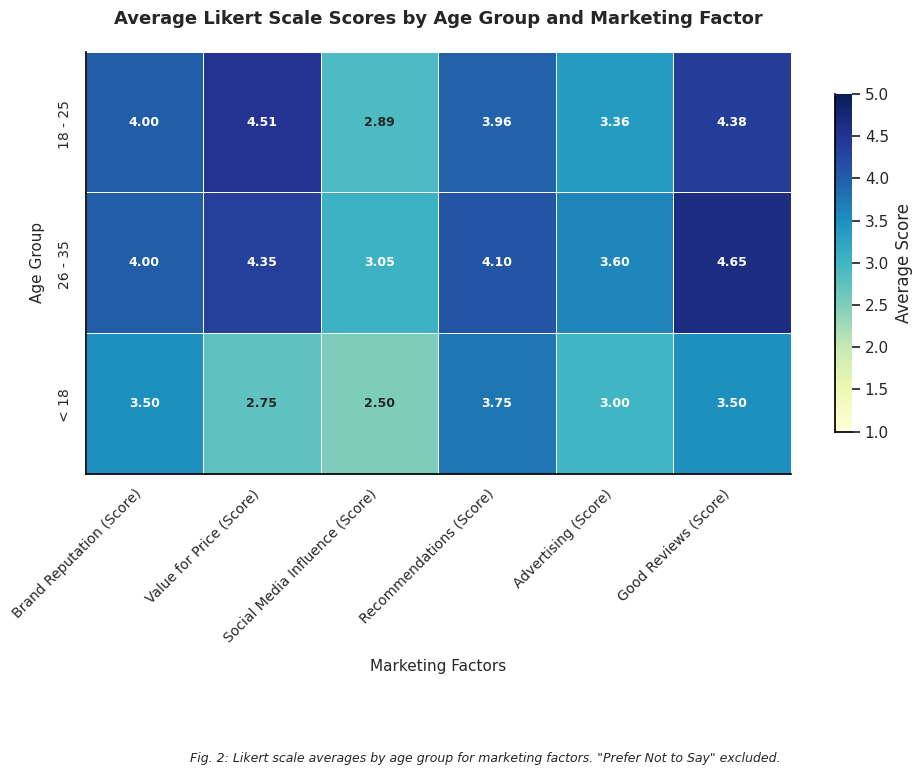

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style for academic presentation
sns.set_style("whitegrid", {"axes.grid": False, "axes.edgecolor": "black"})

# Define Likert encoding
likert_map = {
    'Extremely unimportant': 1,
    'Somewhat unimportant': 2,
    'Neutral': 3,
    'Somewhat important': 4,
    'Extremely important': 5
}

# Columns to encode
columns_to_score = ['Brand Reputation', 'Value for Price', 'Social Media Influence',
                    'Recommendations', 'Advertising', 'Good Reviews']

# Encode Likert scale responses
for col in columns_to_score:
    df[col + ' (Score)'] = df[col].map(likert_map)

# Remove 'Prefer Not to Say' from Age
filtered_df = df[df['Age'].str.strip().str.lower() != 'prefer not to say']

# Group by Age and compute mean Likert scores
heat_data = filtered_df.groupby('Age')[[col + ' (Score)' for col in columns_to_score]].mean()

# Check if data exists after filtering
if heat_data.empty:
    print("Warning: No data remains after filtering 'Prefer Not to Say' from Age.")
else:
    # Plot the heatmap
    plt.figure(figsize=(10, 7))
    sns.heatmap(
        heat_data,
        annot=True,
        fmt='.2f',
        cmap='YlGnBu',
        linewidths=0.5,
        linecolor='white',
        cbar_kws={'label': 'Average Score', 'shrink': 0.8},
        annot_kws={'fontsize': 9, 'fontweight': 'bold'},
        vmin=1, vmax=5
    )

    # Titles and labels
    plt.title('Average Likert Scale Scores by Age Group and Marketing Factor',
              fontsize=13, fontweight='bold', pad=20)
    plt.xlabel('Marketing Factors', fontsize=11, labelpad=10)
    plt.ylabel('Age Group', fontsize=11, labelpad=10)

    # Label formatting
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)

    # Academic-style caption
    plt.figtext(0.5, -0.1,
                'Fig. 2: Likert scale averages by age group for marketing factors. "Prefer Not to Say" excluded.',
                ha='center', fontsize=9, style='italic')

    # Clean up plot
    sns.despine()
    plt.tight_layout()
    plt.show()


In [8]:
# Save cleaned data with scored responses
df.to_excel('cleaned_survey_data.xlsx', index=False)

#MACHINE LEARNING

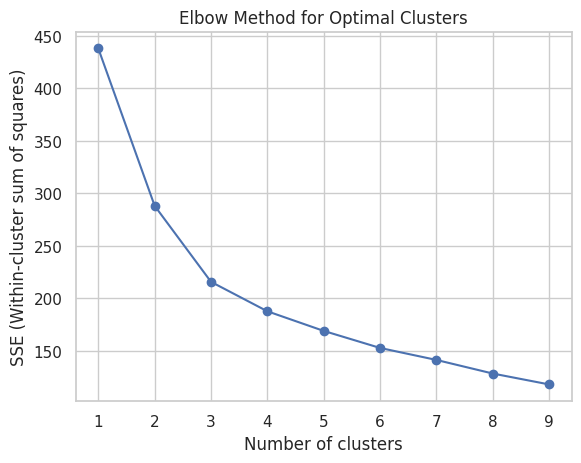

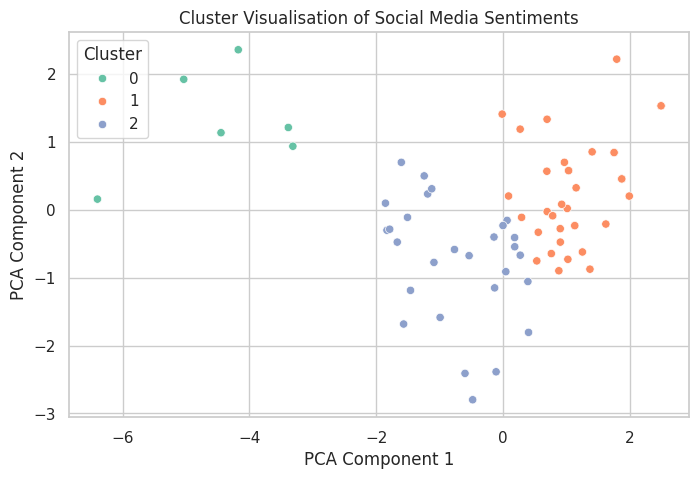

Influenced to Buy,Maybe,No,Yes
Cluster,,,
0,0.000000,33.333333,66.666667
1,12.820513,5.128205,82.051282
2,7.142857,28.571429,64.285714


In [14]:
# STEP 1: Extract and scale relevant Likert scores
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

likert_features = [col + ' (Score)' for col in columns_to_score if col + ' (Score)' in df.columns]
clustering_data = df[likert_features].dropna()

# Standardize data for clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data)

# STEP 2: Use Elbow Method to find optimal cluster count
sse = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 10), sse, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('SSE (Within-cluster sum of squares)')
plt.show()


# Choose number of clusters (e.g., 3 based on elbow result)
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(scaled_data)


# Reduce to 2D using PCA for plotting
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

# Plot clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=df['Cluster'], palette='Set2')
plt.title('Cluster Visualisation of Social Media Sentiments')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


# Get cluster profiles
cluster_profiles = df.groupby('Cluster')[likert_features].mean().round(2)
cluster_profiles


# Check how each cluster answered the 'Influenced to Buy' question
pd.crosstab(df['Cluster'], df['Influenced to Buy'], normalize='index') * 100
